In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from gan import *
from two_d_utils import *
from callbacks import *

Using TensorFlow backend.


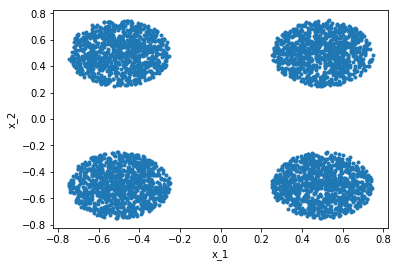

In [2]:
X_train = generate_2d(10000, 0.5)/2
X_test = generate_2d(1000, 0.5)/2
show_2d(X_test)

W0605 15:46:50.162858 4728280512 training.py:2131] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
W0605 15:46:50.671280 4728280512 training.py:2131] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?



0 [D loss: 0.692765, acc.: 73.05%] [G loss: 0.694902]


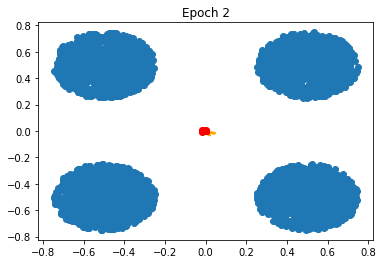

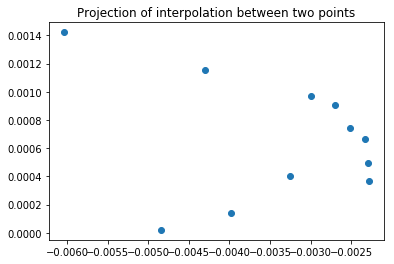

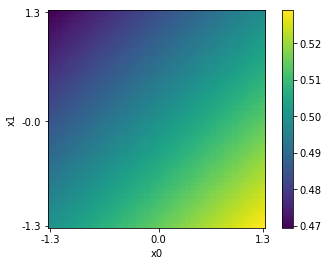

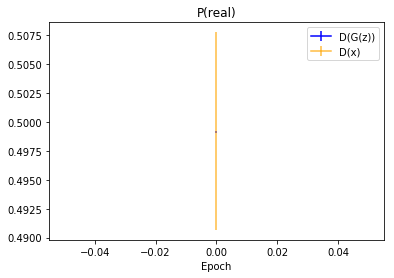


1 [D loss: 0.692956, acc.: 75.39%] [G loss: 0.694176]


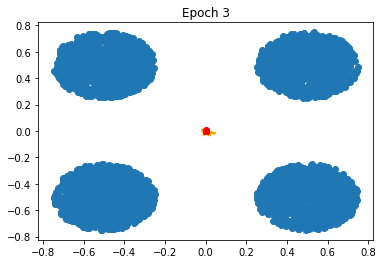

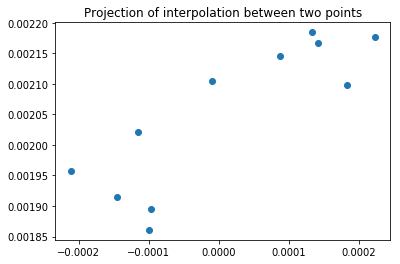

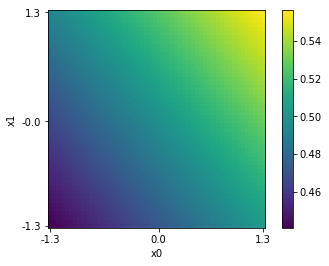

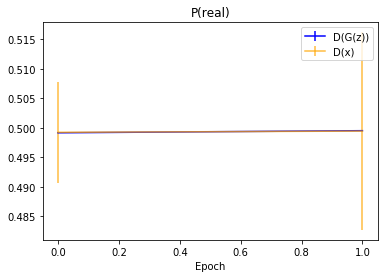


2 [D loss: 0.693090, acc.: 75.00%] [G loss: 0.693595]


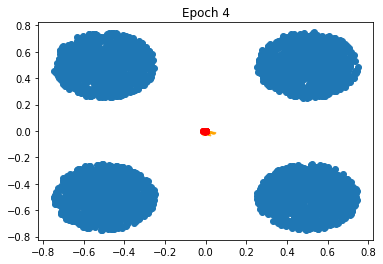

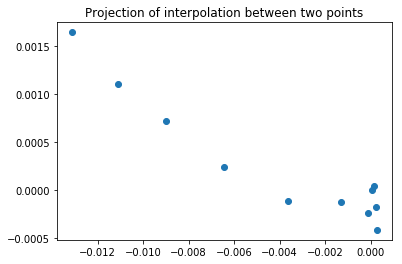

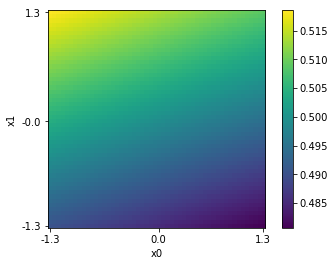

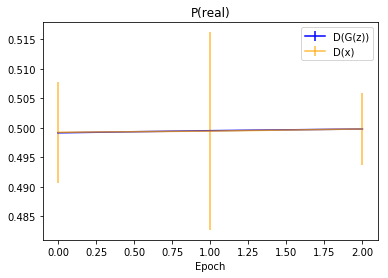


3 [D loss: 0.220341, acc.: 94.92%] [G loss: 2.127636]


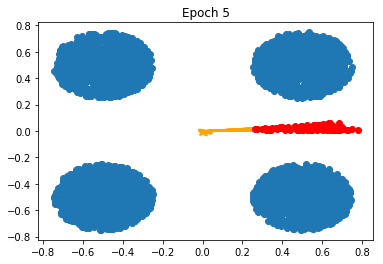

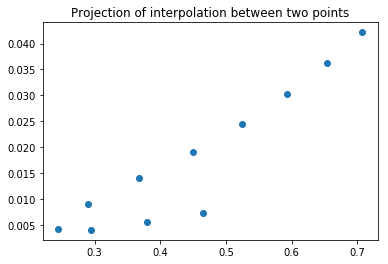

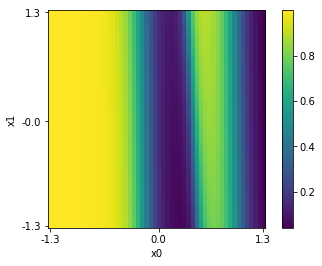

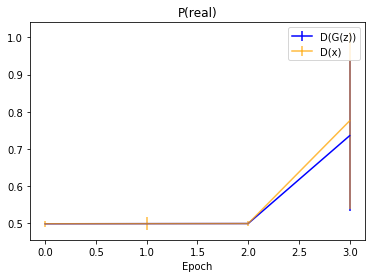


4 [D loss: 0.697062, acc.: 40.62%] [G loss: 0.705753]


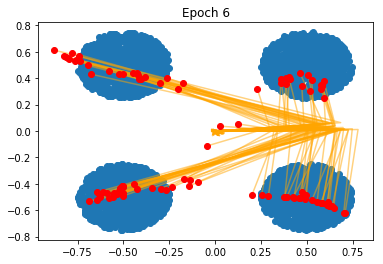

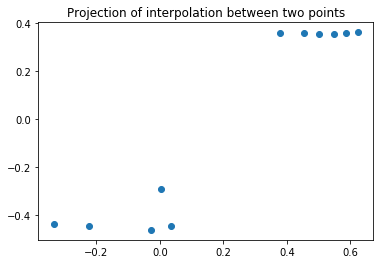

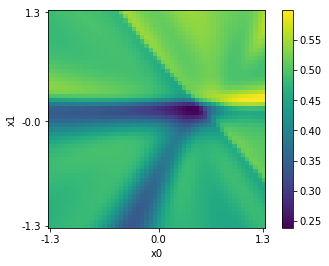

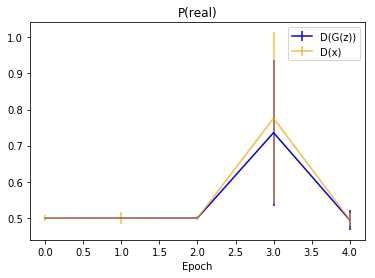


5 [D loss: 0.680647, acc.: 67.19%] [G loss: 0.712161]


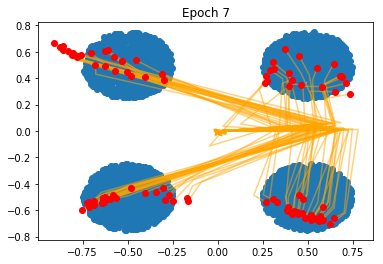

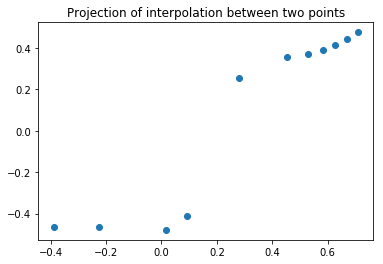

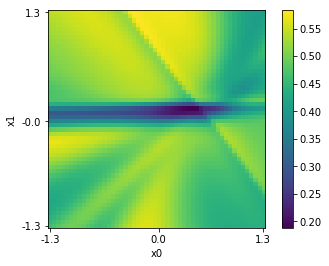

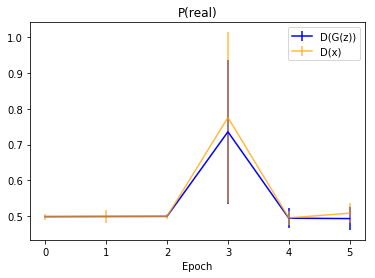


6 [D loss: 0.687643, acc.: 52.73%] [G loss: 0.670003]


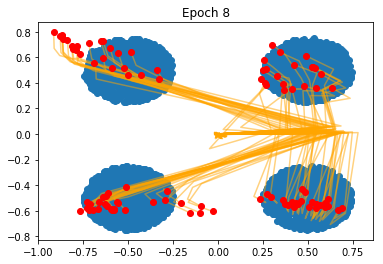

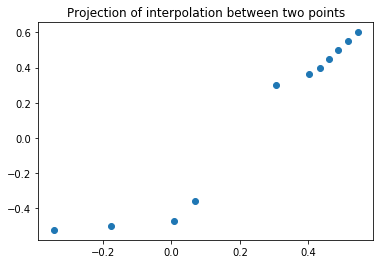

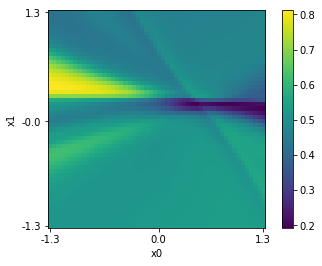

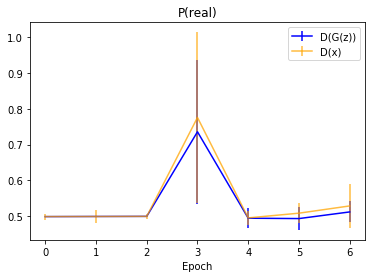


7 [D loss: 0.688597, acc.: 54.69%] [G loss: 0.697339]


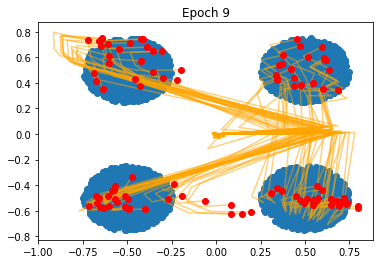

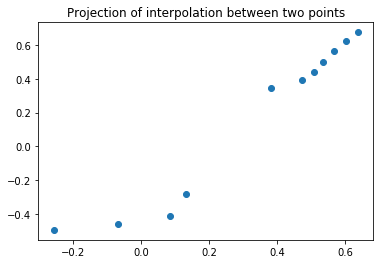

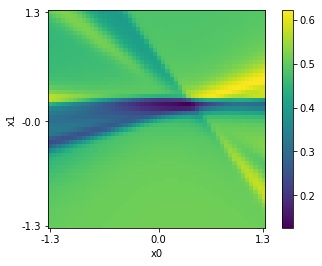

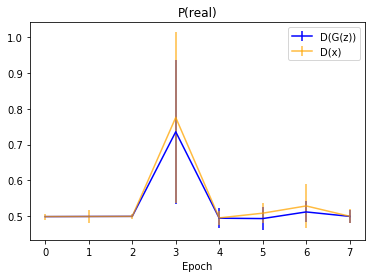


8 [D loss: 0.692138, acc.: 56.25%] [G loss: 0.693224]


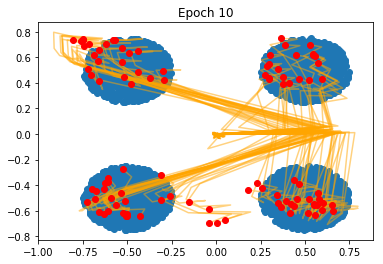

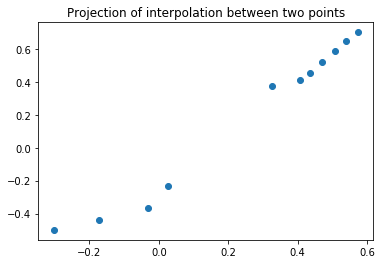

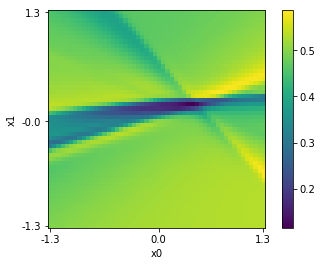

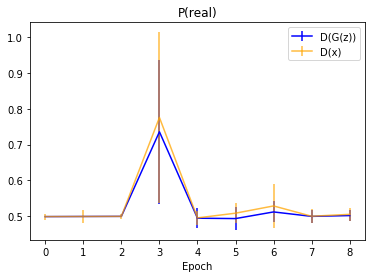


9 [D loss: 0.695030, acc.: 48.83%] [G loss: 0.693840]


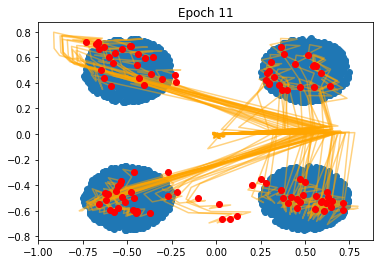

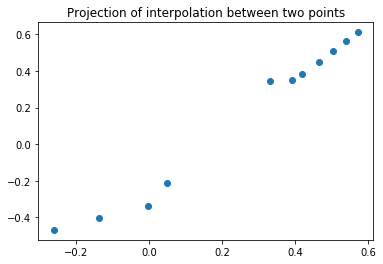

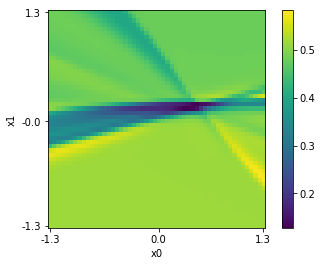

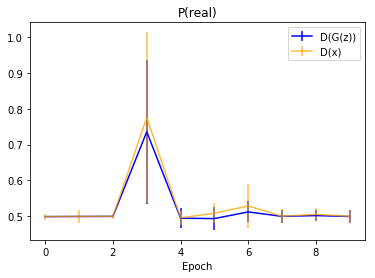


10 [D loss: 0.693804, acc.: 41.80%] [G loss: 0.696112]


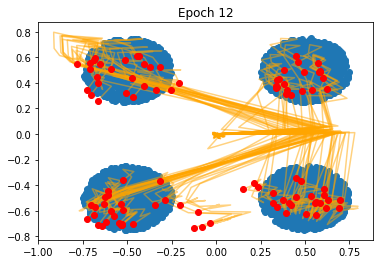

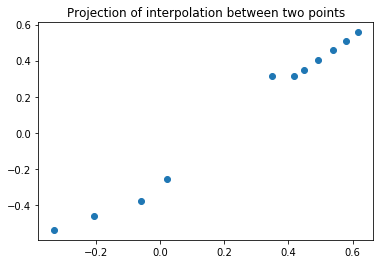

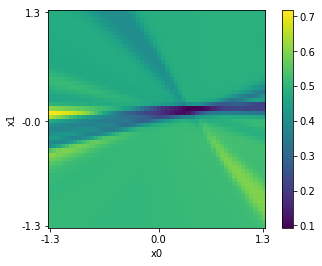

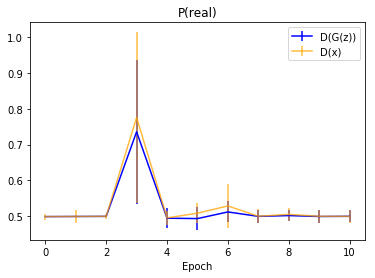


11 [D loss: 0.695386, acc.: 47.27%] [G loss: 0.701705]


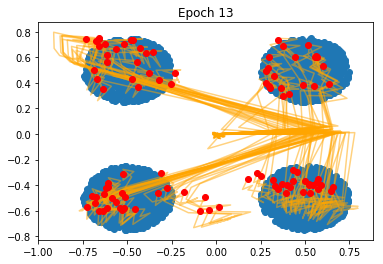

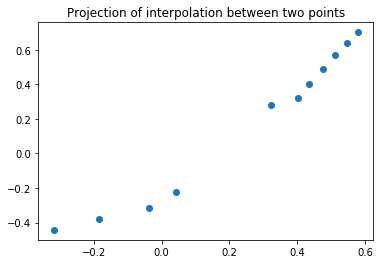

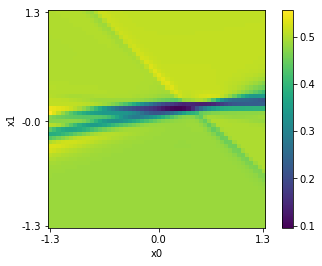

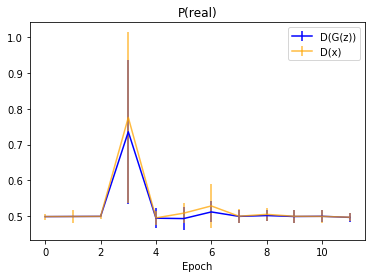


12 [D loss: 0.691803, acc.: 53.91%] [G loss: 0.699048]


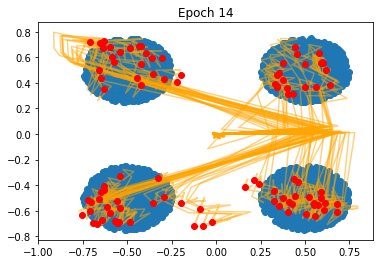

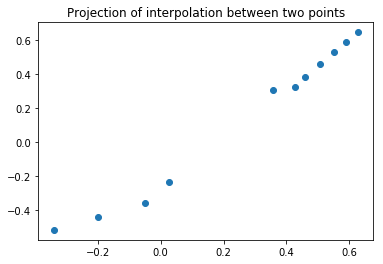

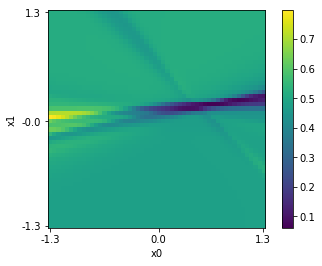

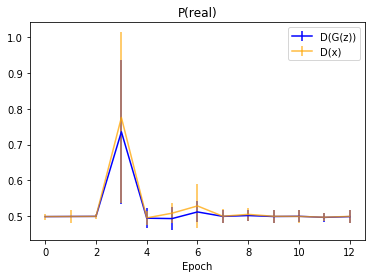


13 [D loss: 0.701334, acc.: 48.83%] [G loss: 0.689145]


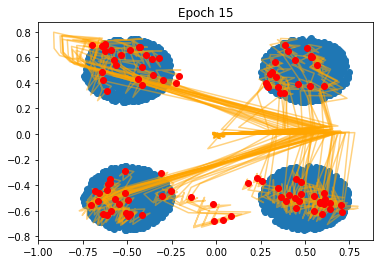

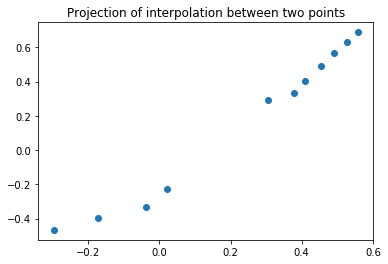

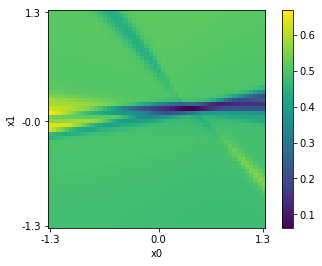

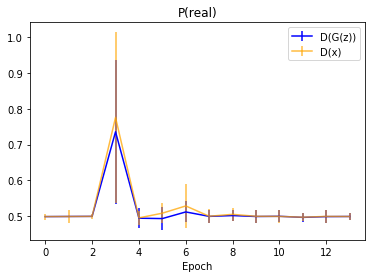


14 [D loss: 0.693063, acc.: 50.78%] [G loss: 0.695639]


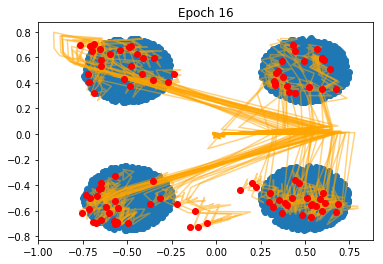

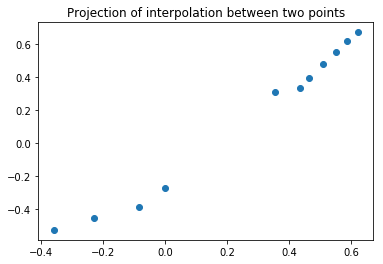

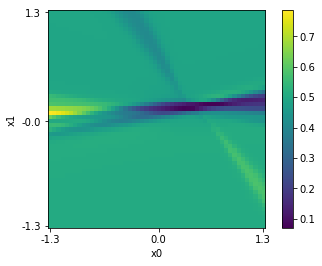

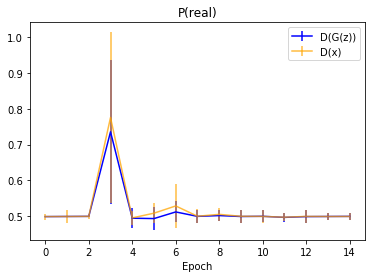


15 [D loss: 0.692049, acc.: 54.69%] [G loss: 0.704044]


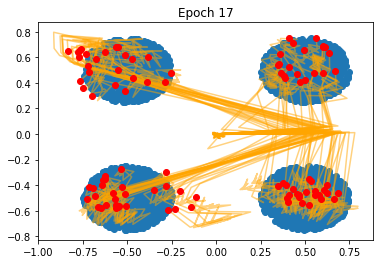

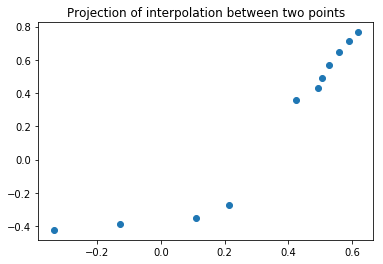

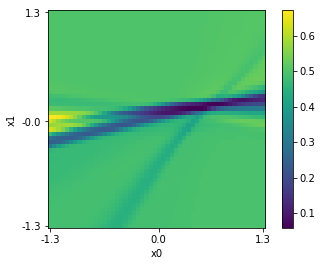

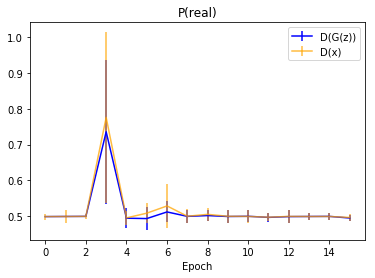


16 [D loss: 0.694929, acc.: 46.88%] [G loss: 0.697171]


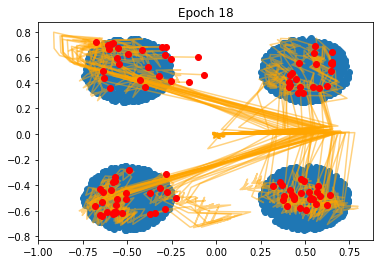

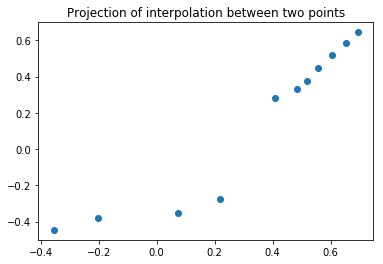

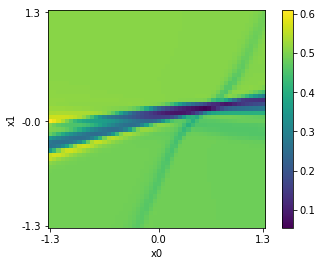

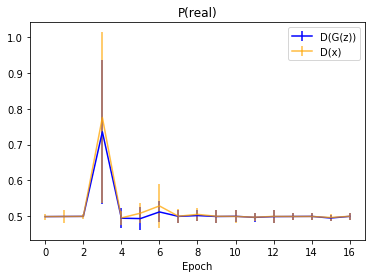


17 [D loss: 0.694820, acc.: 41.80%] [G loss: 0.702559]


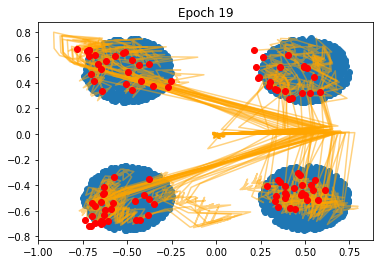

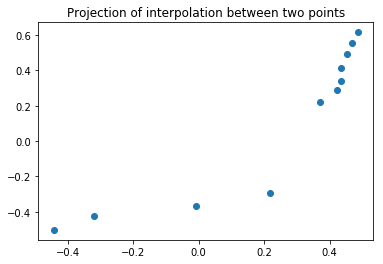

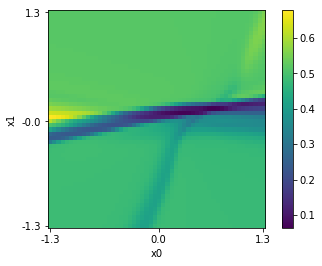

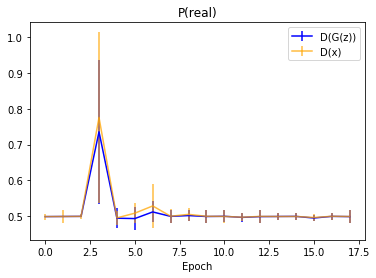


18 [D loss: 0.693878, acc.: 53.52%] [G loss: 0.696493]


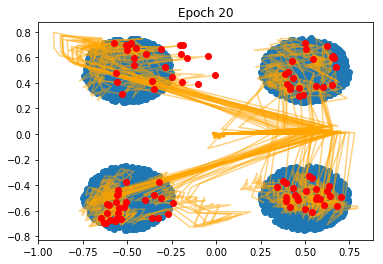

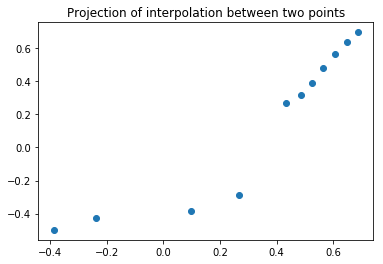

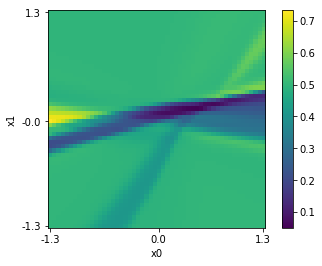

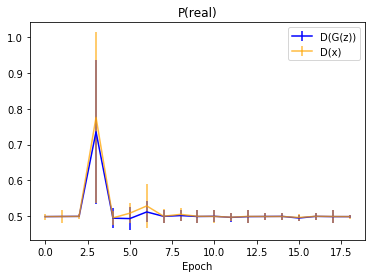


19 [D loss: 0.694074, acc.: 51.56%] [G loss: 0.703905]


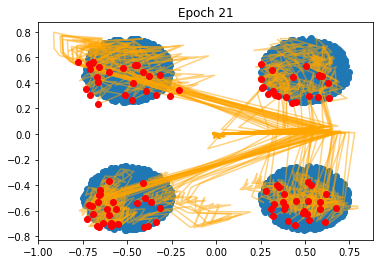

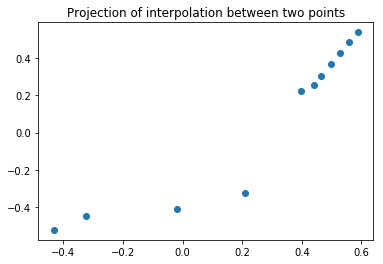

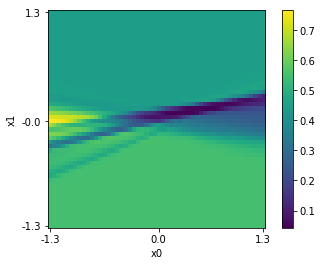

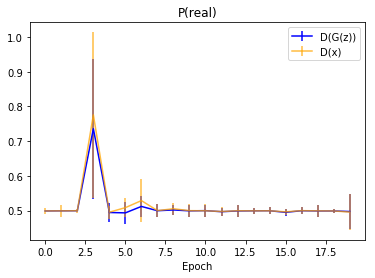


20 [D loss: 0.693469, acc.: 46.88%] [G loss: 0.695711]


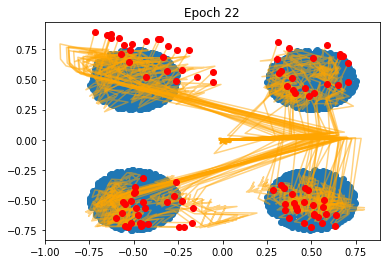

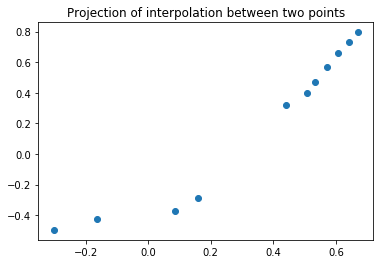

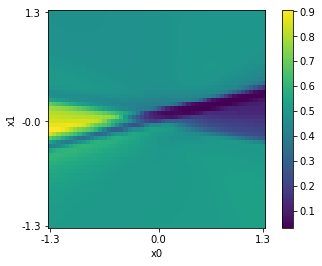

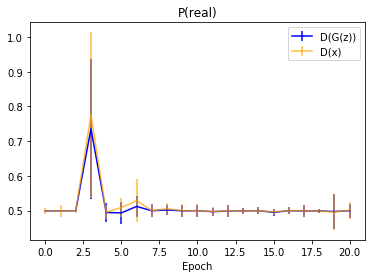


21 [D loss: 0.686472, acc.: 54.30%] [G loss: 0.703628]


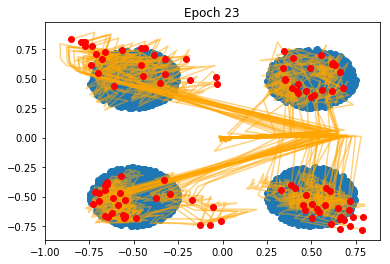

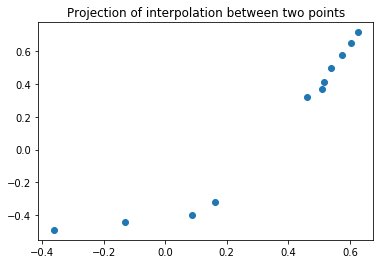

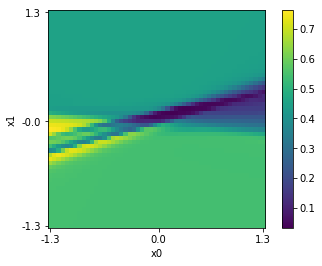

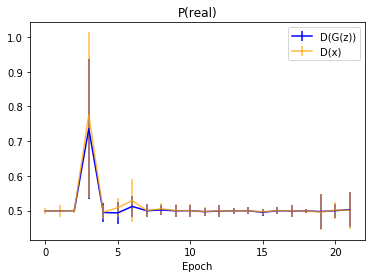


22 [D loss: 0.694701, acc.: 48.44%] [G loss: 0.696246]


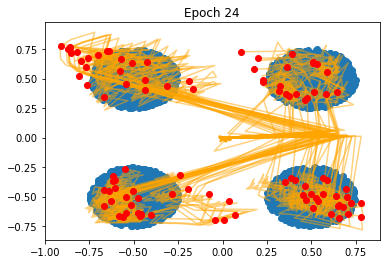

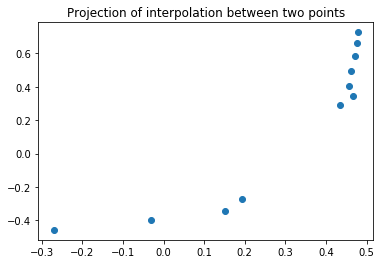

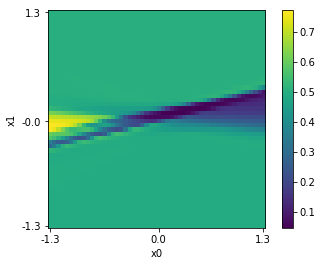

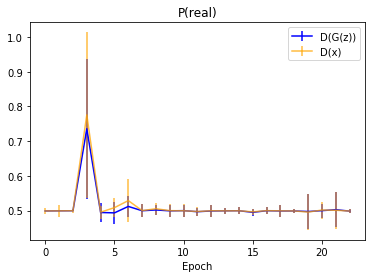


23 [D loss: 0.695406, acc.: 47.27%] [G loss: 0.697929]


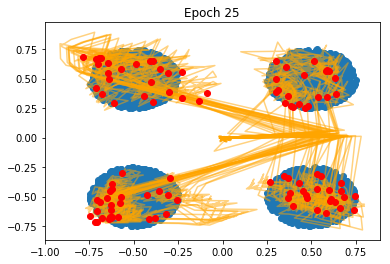

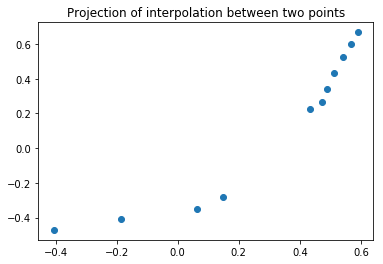

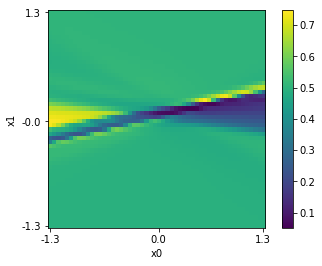

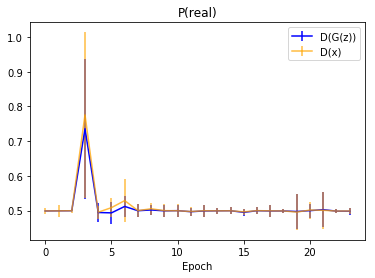


24 [D loss: 0.693439, acc.: 52.34%] [G loss: 0.701673]


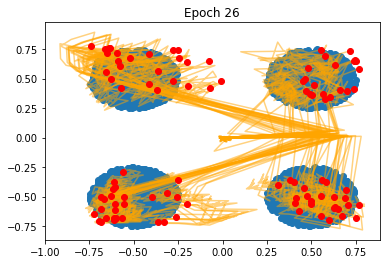

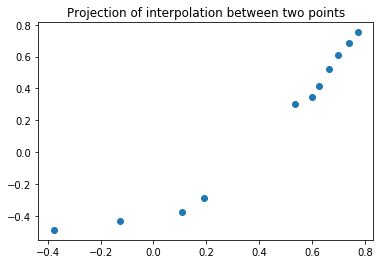

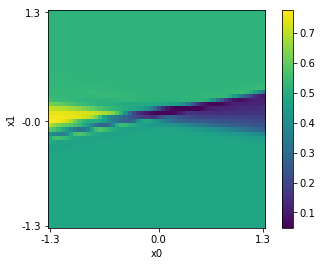

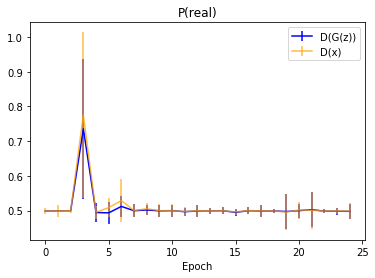

In [ ]:
class MiniGan(DCGAN):
    def __init__(self, prior, img_shape=[2], load_from=None, neurons=512):
        self.neurons = neurons
        super().__init__(prior, img_shape, load_from)
        
    def build_generator(self):

        model = Sequential()

        model.add(Dense(self.neurons, activation="relu", input_dim=self.prior.d))
        model.add(Dense(self.neurons, activation="relu", input_dim=self.prior.d))
        model.add(Dense(self.neurons, activation="relu", input_dim=self.prior.d))
        model.add(Dense(2, activation="tanh"))

        noise = Input(shape=(self.prior.d,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Dense(self.neurons, activation="tanh", input_dim=self.prior.d))
        model.add(Dense(self.neurons, activation="tanh", input_dim=self.prior.d))
        model.add(Dense(self.neurons, activation="tanh", input_dim=self.prior.d))
        
        model.add(Dense(1, activation='sigmoid'))

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)


    
gan = MiniGan(Unconnected(2), neurons=512)

        

pmetric = PMetrics(gan, X_test)
e = EvolvingCallback2D(gan, X_test)
period = 1
callbacks = [
    (e.track, 1),
    (e.plot, period),
    (InterpolationCallback2D(gan).plot, period),
    (DLandscapeCallback(gan).plot, period),
    (pmetric.track, 1),
    (pmetric.plot, period)
]
  
gan.train(X_train, epochs=100, batch_size=128, callbacks=callbacks, d_steps=4)